In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Establecer la carpeta de trabajo
os.chdir("/Users/bautistagoulu/Desktop/Big Data")

# Cargar la base de datos
df = pd.read_excel("respondieron2.xlsx")

In [23]:
# EJERCICIO 1

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


#Repetimos recordando lo realizado en el TP3 

#Creamos algunas variables necesarias
df["desocupado"] = (df["ESTADO"] == 2).astype(int)
df["desocupado"].value_counts()
df["dummy_mujer"] = (df["CH04"] == 2).astype(int)

#Defino variables explicativas
variables_X = ["dummy_casado", "dummy_secundario_completo", "dummy_superior_completo", "dummy_mujer"]

# ==========================
# Año 2024
# ==========================
df_2024 = df[df["ANO4"] == 2024].copy()
X_2024 = df_2024[variables_X]
y_2024 = df_2024["desocupado"]

X_train_24, X_test_24, y_train_24, y_test_24 = train_test_split(
    X_2024, y_2024, test_size=0.3, random_state=444
)

X_train_24 = X_train_24.reset_index(drop=True)
X_train_24.insert(0, "constante", 1)


# ==========================
# Año 2004
# ==========================
df_2004 = df[df["ANO4"] == 2004].copy()
X_2004 = df_2004[variables_X]
y_2004 = df_2004["desocupado"]

X_train_04, X_test_04, y_train_04, y_test_04 = train_test_split(
    X_2004, y_2004, test_size=0.3, random_state=444
)

X_train_04 = X_train_04.reset_index(drop=True)
X_train_04.insert(0, "constante", 1)

In [19]:
# Función para preparar datos por año
def preparar_datos(df, year):
    df_year = df[df["ANO4"] == year].copy()
    X = df_year[variables_X]
    y = df_year["desocupado"]
    return train_test_split(X, y, test_size=0.3, random_state=444)

# Preparar datos para 2024 y 2004
X_train_24, X_test_24, y_train_24, y_test_24 = preparar_datos(df, 2024)
X_train_04, X_test_04, y_train_04, y_test_04 = preparar_datos(df, 2004)

# Grillas de lambda
lambdas_ridge = np.logspace(-5, 5, 50)
lambdas_lasso = np.logspace(-4, 4, 20)

# Función para entrenar modelo con CV
def entrenar_modelo(X_train, y_train, tipo):
    penalty = 'l2' if tipo == 'ridge' else 'l1'
    Cs = 1 / (lambdas_ridge if tipo == 'ridge' else lambdas_lasso)

    modelo = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('clf', LogisticRegressionCV(
            Cs=Cs,
            cv=10,
            penalty=penalty,
            solver='liblinear',
            scoring='accuracy',
            max_iter=1000,
            random_state=42
        ))
    ])
    modelo.fit(X_train, y_train)
    best_lambda = 1 / modelo.named_steps['clf'].C_[0]
    return best_lambda

# Entrenar y obtener el mejor lambda
best_lambda_ridge_24 = entrenar_modelo(X_train_24, y_train_24, 'ridge')
best_lambda_lasso_24 = entrenar_modelo(X_train_24, y_train_24, 'lasso')

best_lambda_ridge_04 = entrenar_modelo(X_train_04, y_train_04, 'ridge')
best_lambda_lasso_04 = entrenar_modelo(X_train_04, y_train_04, 'lasso')

print(f"Mejor lambda Ridge 2024: {best_lambda_ridge_24:.6f}")
print(f"Mejor lambda LASSO 2024: {best_lambda_lasso_24:.6f}")
print(f"Mejor lambda Ridge 2004: {best_lambda_ridge_04:.6f}")
print(f"Mejor lambda LASSO 2004: {best_lambda_lasso_04:.6f}")

Mejor lambda Ridge 2024: 0.000010
Mejor lambda LASSO 2024: 0.000100
Mejor lambda Ridge 2004: 0.000010
Mejor lambda LASSO 2004: 0.000100


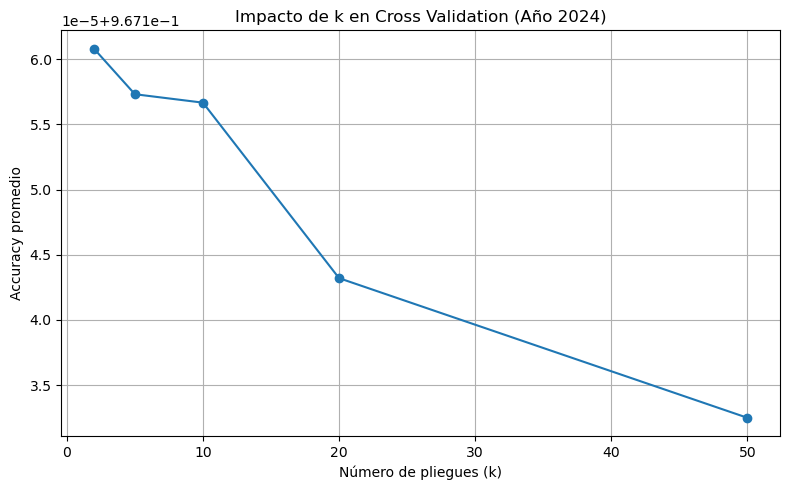

k = 2: Accuracy promedio = 0.9672
k = 5: Accuracy promedio = 0.9672
k = 10: Accuracy promedio = 0.9672
k = 20: Accuracy promedio = 0.9671
k = 50: Accuracy promedio = 0.9671


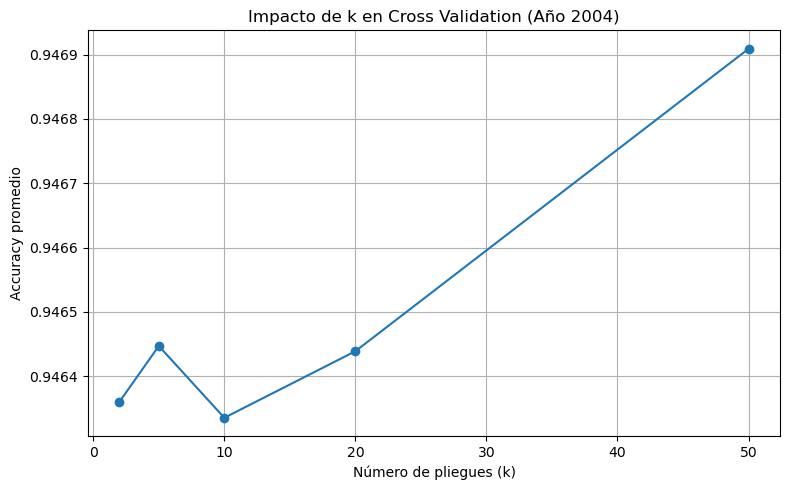

k = 2: Accuracy promedio = 0.9464
k = 5: Accuracy promedio = 0.9464
k = 10: Accuracy promedio = 0.9463
k = 20: Accuracy promedio = 0.9464
k = 50: Accuracy promedio = 0.9469


In [30]:
#EJERCICIO 2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Modelo sin penalización
modelo = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)

# Valores de k a probar
valores_k = [2, 5, 10, 20, 50]
scores_promedio = []

# Cross-validation para cada valor de k
for k in valores_k:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(modelo, X_train_24, y_train_24, cv=cv, scoring='accuracy')
    scores_promedio.append(scores.mean())

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(valores_k, scores_promedio, marker='o')
plt.xlabel('Número de pliegues (k)')
plt.ylabel('Accuracy promedio')
plt.title('Impacto de k en Cross Validation (Año 2024)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Resultados en consola
for k, acc in zip(valores_k, scores_promedio):
    print(f"k = {k}: Accuracy promedio = {acc:.4f}")

# Mismo código pero para 2004
scores_promedio = []
for k in valores_k:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(modelo, X_train_04, y_train_04, cv=cv, scoring='accuracy')
    scores_promedio.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(valores_k, scores_promedio, marker='o')
plt.xlabel('Número de pliegues (k)')
plt.ylabel('Accuracy promedio')
plt.title('Impacto de k en Cross Validation (Año 2004)')
plt.grid(True)
plt.tight_layout()
plt.show()

for k, acc in zip(valores_k, scores_promedio):
    print(f"k = {k}: Accuracy promedio = {acc:.4f}")





--- Ridge 2004 ---
Matriz de confusión:
[[208   0]
 [ 17   0]]
Accuracy: 0.9244
AUC: 0.4176

--- LASSO 2004 ---
Matriz de confusión:
[[208   0]
 [ 17   0]]
Accuracy: 0.9244
AUC: 0.4176

--- Ridge 2024 ---
Matriz de confusión:
[[1200    0]
 [  41    0]]
Accuracy: 0.9670
AUC: 0.5918

--- LASSO 2024 ---
Matriz de confusión:
[[1200    0]
 [  41    0]]
Accuracy: 0.9670
AUC: 0.5918


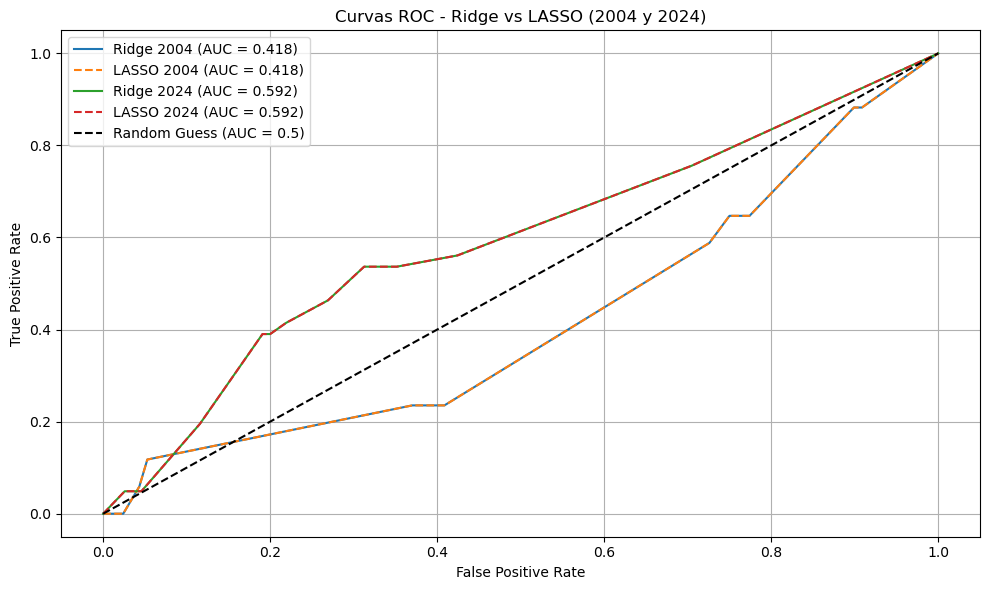

In [48]:
#3
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Quitar la columna "constante" si está
X_train_04 = X_train_04.drop(columns="constante", errors="ignore")
X_test_04 = X_test_04.drop(columns="constante", errors="ignore")
X_train_24 = X_train_24.drop(columns="constante", errors="ignore")
X_test_24 = X_test_24.drop(columns="constante", errors="ignore")

# Entrenar modelos
ridge_04 = LogisticRegression(penalty='l2', C=1/best_lambda_ridge_04, solver='liblinear', max_iter=1000)
ridge_04.fit(X_train_04, y_train_04)

lasso_04 = LogisticRegression(penalty='l1', C=1/best_lambda_lasso_04, solver='liblinear', max_iter=1000)
lasso_04.fit(X_train_04, y_train_04)

ridge_24 = LogisticRegression(penalty='l2', C=1/best_lambda_ridge_24, solver='liblinear', max_iter=1000)
ridge_24.fit(X_train_24, y_train_24)

lasso_24 = LogisticRegression(penalty='l1', C=1/best_lambda_lasso_24, solver='liblinear', max_iter=1000)
lasso_24.fit(X_train_24, y_train_24)

# Función para evaluar
def evaluar(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n--- {nombre} ---")
    print("Matriz de confusión:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    return roc_curve(y_test, y_proba), auc

# Evaluar y guardar curvas
(fpr_r04, tpr_r04, _), auc_r04 = evaluar(ridge_04, X_test_04, y_test_04, "Ridge 2004")
(fpr_l04, tpr_l04, _), auc_l04 = evaluar(lasso_04, X_test_04, y_test_04, "LASSO 2004")
(fpr_r24, tpr_r24, _), auc_r24 = evaluar(ridge_24, X_test_24, y_test_24, "Ridge 2024")
(fpr_l24, tpr_l24, _), auc_l24 = evaluar(lasso_24, X_test_24, y_test_24, "LASSO 2024")

# Gráfico conjunto de curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_r04, tpr_r04, label=f'Ridge 2004 (AUC = {auc_r04:.3f})')
plt.plot(fpr_l04, tpr_l04, '--', label=f'LASSO 2004 (AUC = {auc_l04:.3f})')
plt.plot(fpr_r24, tpr_r24, label=f'Ridge 2024 (AUC = {auc_r24:.3f})')
plt.plot(fpr_l24, tpr_l24, '--', label=f'LASSO 2024 (AUC = {auc_l24:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC - Ridge vs LASSO (2004 y 2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




Año 2004:
λ óptimo para Ridge: 1.0
λ óptimo para LASSO: 10.0


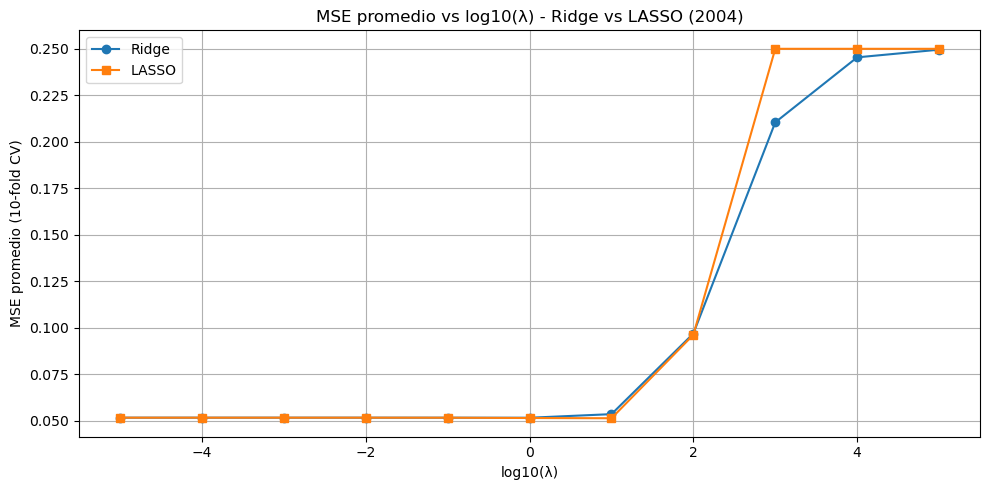

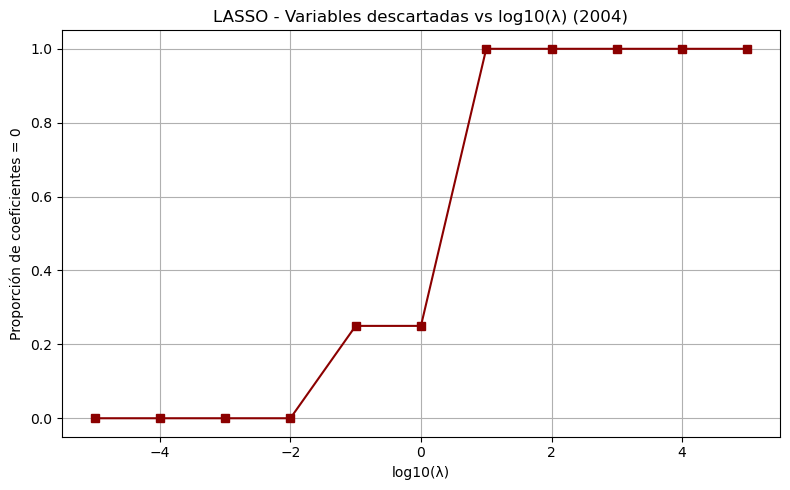


Año 2024:
λ óptimo para Ridge: 1.0
λ óptimo para LASSO: 10.0


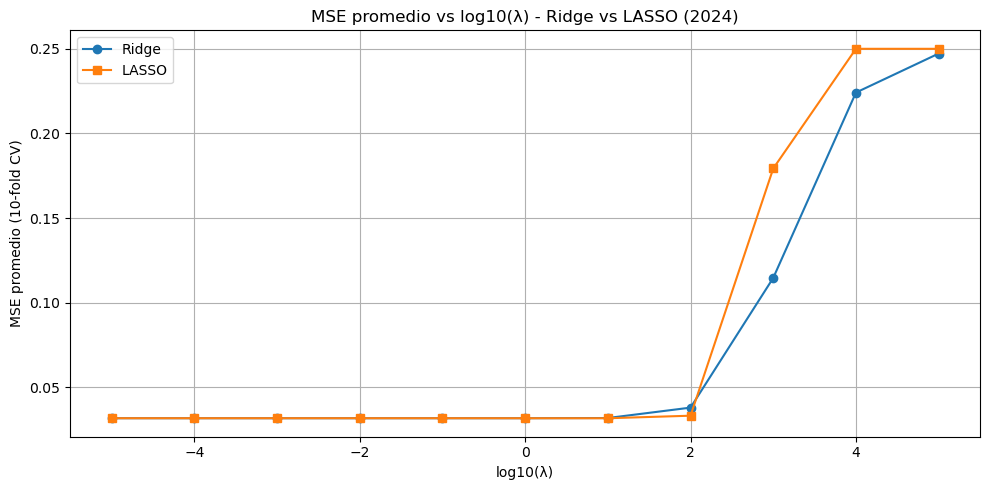

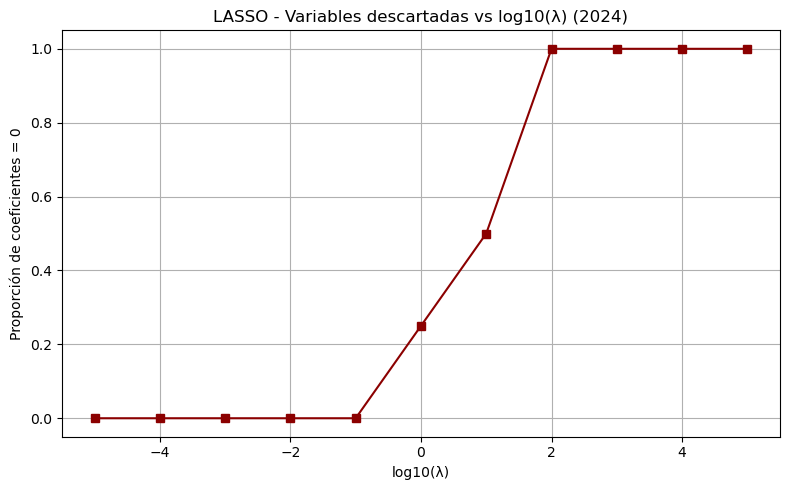

In [46]:
# EJERCICIO 4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# --- Definir grilla de λ ---
n_vals = np.arange(-5, 6)
lambdas = 10.0 ** n_vals  # usar float para evitar error
Cs = 1 / lambdas
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Función para evaluar por año
def evaluar_ridge_lasso(X_train, y_train, año):
    mse_ridge = []
    mse_lasso = []
    proporcion_descartadas_lasso = []

    for C in Cs:
        # --- Ridge ---
        ridge = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('logreg', LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000))
        ])
        y_pred_ridge = cross_val_predict(ridge, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
        mse_ridge.append(mean_squared_error(y_train, y_pred_ridge))

        # --- LASSO ---
        lasso = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('logreg', LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000))
        ])
        y_pred_lasso = cross_val_predict(lasso, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
        mse_lasso.append(mean_squared_error(y_train, y_pred_lasso))

        # Proporción de coeficientes == 0 (descartados)
        lasso.fit(X_train, y_train)
        coef = lasso.named_steps['logreg'].coef_[0]
        proporción_ceros = np.mean(coef == 0)
        proporcion_descartadas_lasso.append(proporción_ceros)

    # --- Mostrar mejor λ ---
    mejor_lambda_ridge = lambdas[np.argmin(mse_ridge)]
    mejor_lambda_lasso = lambdas[np.argmin(mse_lasso)]
    print(f"\nAño {año}:")
    print("λ óptimo para Ridge:", mejor_lambda_ridge)
    print("λ óptimo para LASSO:", mejor_lambda_lasso)

    # --- Gráfico MSE promedio ---
    plt.figure(figsize=(10, 5))
    plt.plot(n_vals, mse_ridge, marker='o', label='Ridge')
    plt.plot(n_vals, mse_lasso, marker='s', label='LASSO')
    plt.xlabel("log10(λ)")
    plt.ylabel("MSE promedio (10-fold CV)")
    plt.title(f"MSE promedio vs log10(λ) - Ridge vs LASSO ({año})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Gráfico de proporción de ceros (solo LASSO) ---
    plt.figure(figsize=(8, 5))
    plt.plot(n_vals, proporcion_descartadas_lasso, marker='s', color='darkred')
    plt.xlabel("log10(λ)")
    plt.ylabel("Proporción de coeficientes = 0")
    plt.title(f"LASSO - Variables descartadas vs log10(λ) ({año})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Ejecutar para 2004 y 2024 ---
evaluar_ridge_lasso(X_train_04.drop(columns="constante", errors="ignore"), y_train_04, 2004)
evaluar_ridge_lasso(X_train_24.drop(columns="constante", errors="ignore"), y_train_24, 2024)



In [64]:
# EJERCICIO 5

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# --- Lambdas óptimos dados ---
mejor_lambda_lasso_04 = 10.0
mejor_lambda_lasso_24 = 10.0

# --- Función para mostrar variables seleccionadas y descartadas ---
def mostrar_vars_descartadas(X_train, y_train, lambda_lasso, año):
    C = 1 / lambda_lasso
    modelo = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000))
    ])
    modelo.fit(X_train, y_train)
    coef = modelo.named_steps['logreg'].coef_[0]
    variables = X_train.columns
    seleccionadas = [v for v, c in zip(variables, coef) if c != 0]
    descartadas = [v for v, c in zip(variables, coef) if c == 0]

    print(f"\n📘 Año {año} — λ óptimo: {lambda_lasso}")
    print("🟢 Variables seleccionadas:")
    for v in seleccionadas:
        print("-", v)
    print("🔴 Variables descartadas:")
    for v in descartadas:
        print("-", v)

# --- Ejecutar para 2004 y 2024 ---
X_04 = X_train_04.drop(columns="constante", errors="ignore")
X_24 = X_train_24.drop(columns="constante", errors="ignore")

mostrar_vars_descartadas(X_04, y_train_04, mejor_lambda_lasso_04, 2004)
mostrar_vars_descartadas(X_24, y_train_24, mejor_lambda_lasso_24, 2024)



📘 Año 2004 — λ óptimo: 10.0
🟢 Variables seleccionadas:
🔴 Variables descartadas:
- dummy_casado
- dummy_secundario_completo
- dummy_superior_completo
- dummy_mujer

📘 Año 2024 — λ óptimo: 10.0
🟢 Variables seleccionadas:
- dummy_casado
- dummy_secundario_completo
🔴 Variables descartadas:
- dummy_superior_completo
- dummy_mujer


In [68]:
#EJERCICIO 6
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# λ óptimo = 10 → entonces C = 1/10 = 0.1
C_opt = 0.1

# Función para entrenar y evaluar
def evaluar_mse_test(X_train, y_train, X_test, y_test, metodo, año):
    penalty = 'l1' if metodo == "LASSO" else 'l2'
    modelo = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(penalty=penalty, C=C_opt, solver='liblinear', max_iter=1000))
    ])
    modelo.fit(X_train, y_train)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    mse = mean_squared_error(y_test, y_pred_proba)
    print(f"{metodo} - Año {año} → MSE test: {mse:.5f}")
    return mse

# Preparamos los sets sin "constante"
X_train_04_clean = X_train_04.drop(columns="constante", errors="ignore")
X_test_04_clean = X_test_04.drop(columns="constante", errors="ignore")
X_train_24_clean = X_train_24.drop(columns="constante", errors="ignore")
X_test_24_clean = X_test_24.drop(columns="constante", errors="ignore")

# Evaluar todos
mse_lasso_04 = evaluar_mse_test(X_train_04_clean, y_train_04, X_test_04_clean, y_test_04, "LASSO", 2004)
mse_ridge_04 = evaluar_mse_test(X_train_04_clean, y_train_04, X_test_04_clean, y_test_04, "Ridge", 2004)

mse_lasso_24 = evaluar_mse_test(X_train_24_clean, y_train_24, X_test_24_clean, y_test_24, "LASSO", 2024)
mse_ridge_24 = evaluar_mse_test(X_train_24_clean, y_train_24, X_test_24_clean, y_test_24, "Ridge", 2024)



LASSO - Año 2004 → MSE test: 0.06985
Ridge - Año 2004 → MSE test: 0.07089
LASSO - Año 2024 → MSE test: 0.03178
Ridge - Año 2024 → MSE test: 0.03190



📘 Año 2004 — Mejor profundidad: 1


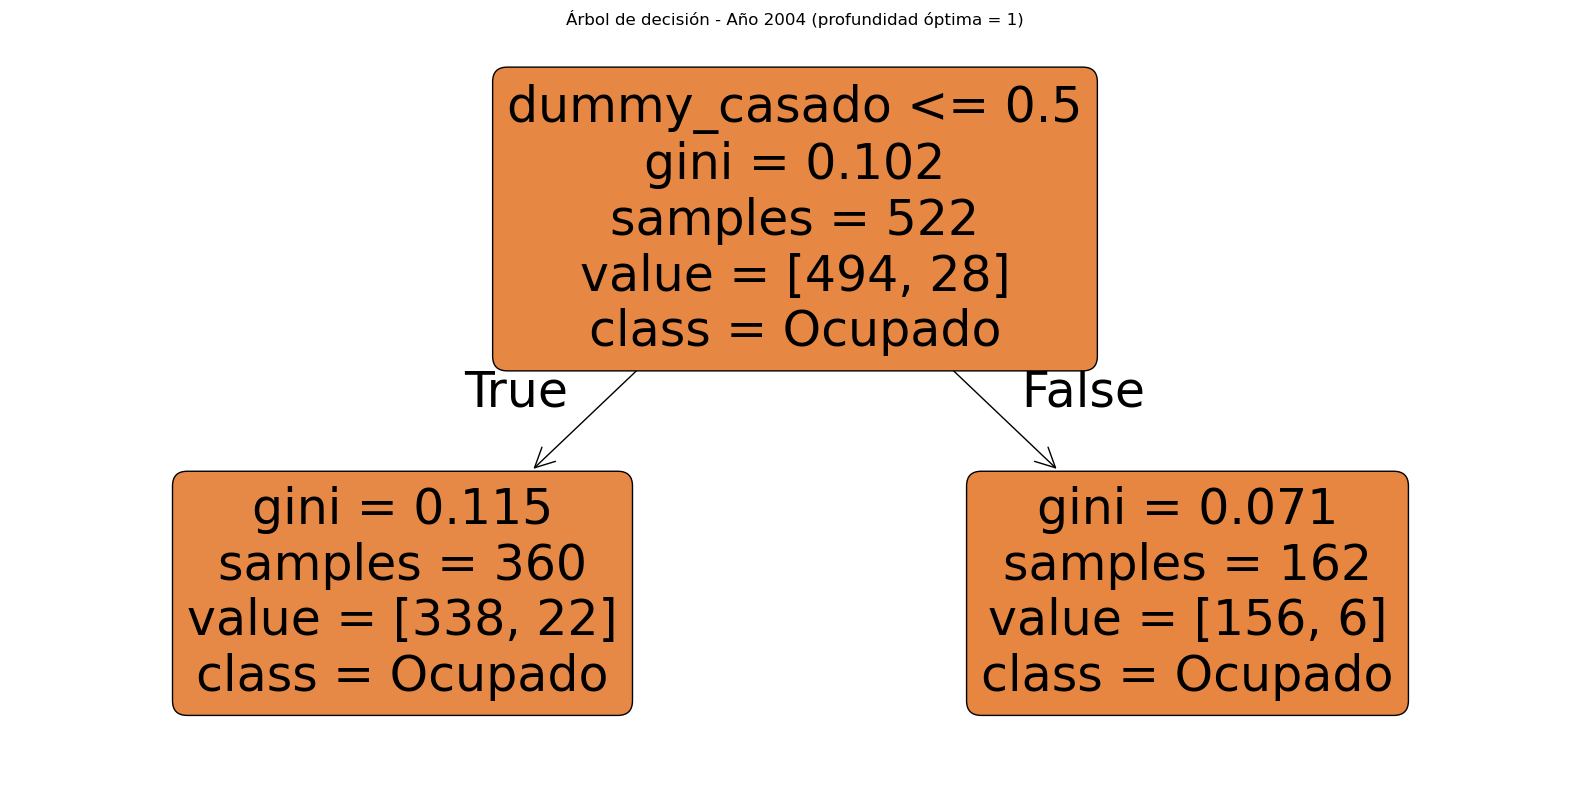


📘 Año 2024 — Mejor profundidad: 1


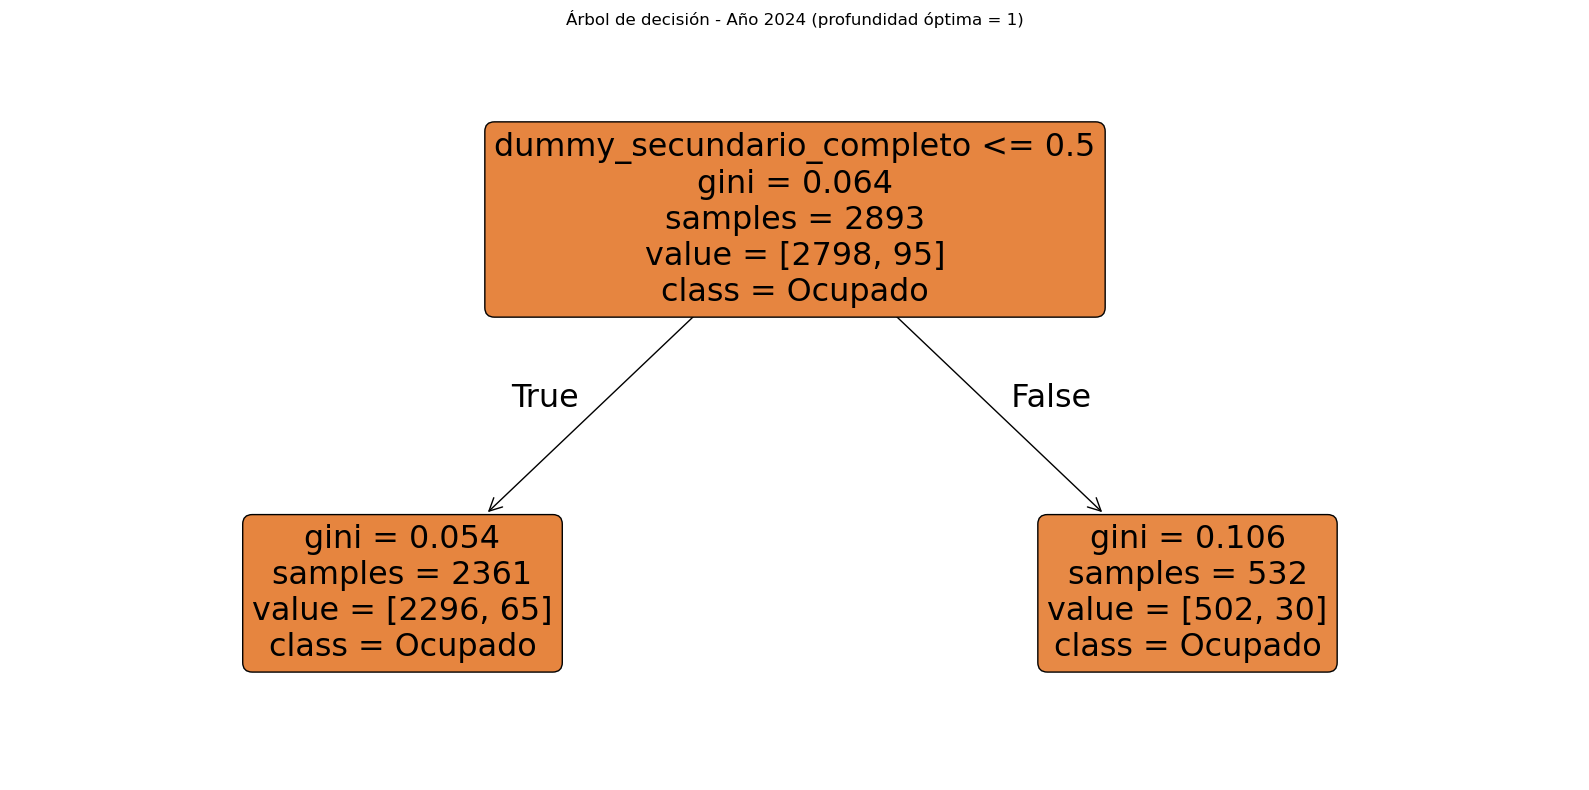

In [70]:
#7

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Rango de profundidad a evaluar
profundidades = range(1, 11)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Función para entrenar y graficar árbol óptimo
def entrenar_y_mostrar_arbol(X_train, y_train, año):
    mean_scores = []
    
    # Validación cruzada para cada profundidad
    for d in profundidades:
        arbol = DecisionTreeClassifier(max_depth=d, random_state=42)
        scores = cross_val_score(arbol, X_train, y_train, cv=cv, scoring='accuracy')
        mean_scores.append(scores.mean())

    # Elegir la mejor profundidad
    mejor_d = profundidades[np.argmax(mean_scores)]
    print(f"\n📘 Año {año} — Mejor profundidad: {mejor_d}")

    # Entrenar árbol final con mejor profundidad
    arbol_final = DecisionTreeClassifier(max_depth=mejor_d, random_state=42)
    arbol_final.fit(X_train, y_train)

    # Graficar el árbol
    plt.figure(figsize=(16, 8))
    plot_tree(arbol_final,
              feature_names=X_train.columns,
              class_names=["Ocupado", "Desocupado"],
              filled=True,
              rounded=True)
    plt.title(f"Árbol de decisión - Año {año} (profundidad óptima = {mejor_d})")
    plt.tight_layout()
    plt.show()

# Quitar columna constante
X_train_04_clean = X_train_04.drop(columns="constante", errors="ignore")
X_train_24_clean = X_train_24.drop(columns="constante", errors="ignore")

# Ejecutar para 2004 y 2024
entrenar_y_mostrar_arbol(X_train_04_clean, y_train_04, 2004)
entrenar_y_mostrar_arbol(X_train_24_clean, y_train_24, 2024)


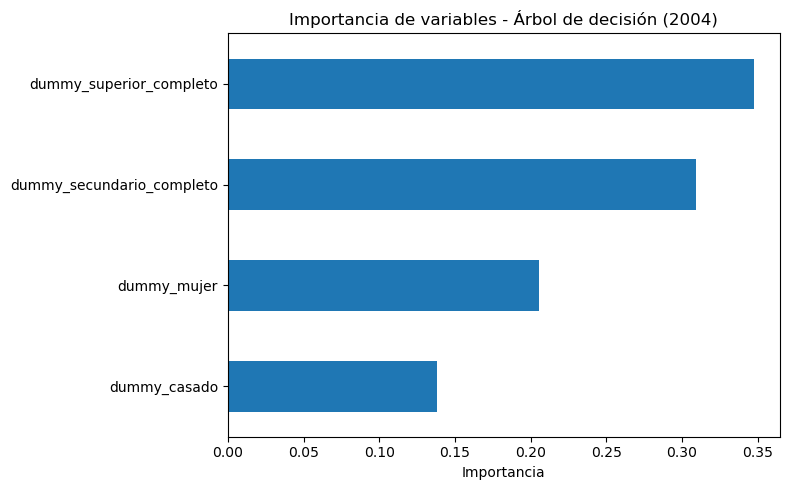

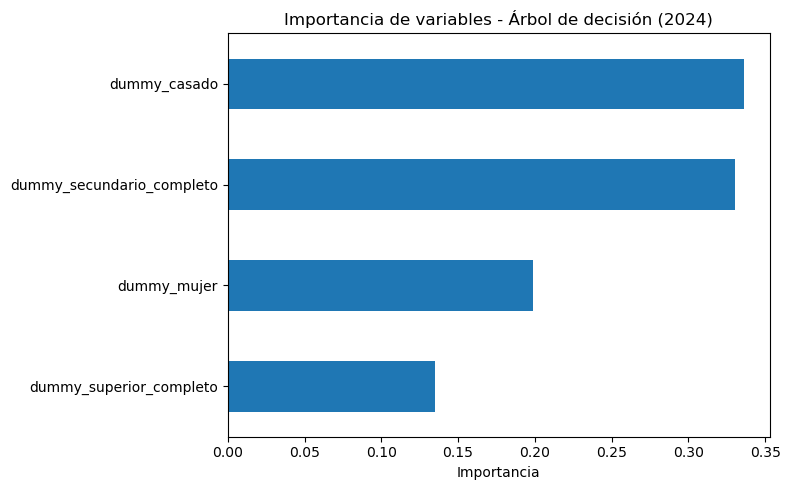

In [72]:
#EJERCICIO 8

# Función para graficar importancia de variables del árbol
def importancia_arbol(X_train, y_train, año):
    arbol = DecisionTreeClassifier(max_depth=None, random_state=42)
    arbol.fit(X_train, y_train)
    
    importancias = pd.Series(arbol.feature_importances_, index=X_train.columns)
    importancias = importancias.sort_values(ascending=True)

    plt.figure(figsize=(8, 5))
    importancias.plot(kind='barh')
    plt.title(f"Importancia de variables - Árbol de decisión ({año})")
    plt.xlabel("Importancia")
    plt.tight_layout()
    plt.show()
    
    return importancias

# Ejecutar para 2004 y 2024
X_04 = X_train_04.drop(columns="constante", errors="ignore")
X_24 = X_train_24.drop(columns="constante", errors="ignore")

importancias_2004 = importancia_arbol(X_04, y_train_04, 2004)
importancias_2024 = importancia_arbol(X_24, y_train_24, 2024)



📘 Árbol - Año 2004
Matriz de confusión:
[[208   0]
 [ 17   0]]
Accuracy: 0.9244
AUC: 0.4201
MSE test: 0.0725


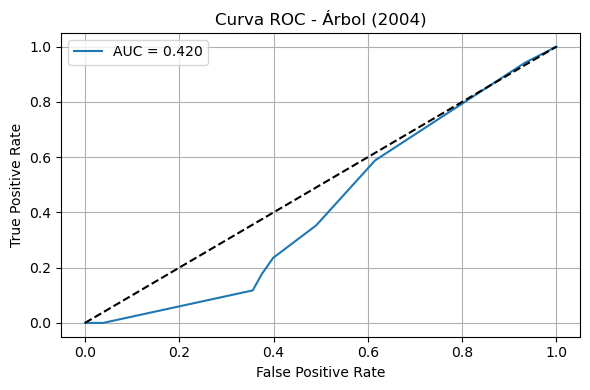


📘 Árbol - Año 2024
Matriz de confusión:
[[1200    0]
 [  41    0]]
Accuracy: 0.9670
AUC: 0.5931
MSE test: 0.0319


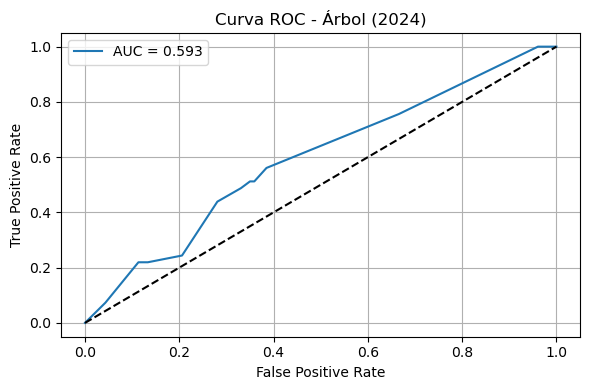

In [76]:
#EJERCICIO 9
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier

# Función para entrenar y evaluar árbol de decisión
def evaluar_arbol(X_train, y_train, X_test, y_test, año):
    arbol = DecisionTreeClassifier(random_state=42)
    arbol.fit(X_train, y_train)

    y_pred = arbol.predict(X_test)
    y_prob = arbol.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    mse = mean_squared_error(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    print(f"\n📘 Árbol - Año {año}")
    print("Matriz de confusión:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"MSE test: {mse:.4f}")

    # Curva ROC
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"Curva ROC - Árbol ({año})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    return acc, auc, mse

# Ejecutar para ambos años
X_train_04_clean = X_train_04.drop(columns="constante", errors="ignore")
X_test_04_clean = X_test_04.drop(columns="constante", errors="ignore")
X_train_24_clean = X_train_24.drop(columns="constante", errors="ignore")
X_test_24_clean = X_test_24.drop(columns="constante", errors="ignore")

acc_04, auc_04, mse_04 = evaluar_arbol(X_train_04_clean, y_train_04, X_test_04_clean, y_test_04, 2004)
acc_24, auc_24, mse_24 = evaluar_arbol(X_train_24_clean, y_train_24, X_test_24_clean, y_test_24, 2024)
